<a href="https://colab.research.google.com/github/moni14-code/dataScience/blob/main/medicalCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Data Analysis

In [2]:
medical=pd.read_csv('/content/insurance.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


information about the dataset

In [3]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical.shape 

(1338, 7)

isnull() -> to check missing values

In [5]:

medical.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
medical.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
minimum=np.min(medical['charges'])
maximum=np.max(medical['charges'])
print('minimum of charges : ',minimum)
print('maximum of charges : ',maximum)

minimum of charges :  1121.8739
maximum of charges :  63770.42801


In [7]:
medical.describe()    #gives statistical values(mean,median..)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


data distribution

In [8]:
medical['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

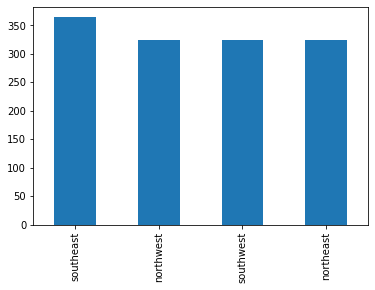

In [9]:
medical['region'].value_counts().plot(kind='bar')


The data is almost same for all 4 .
Out of 4 regions , southeast has little higher (medical cost) data

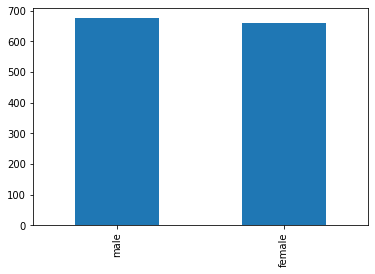

In [10]:
medical['sex'].value_counts().plot(kind='bar')

In [11]:
medical['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

This countplot throws an insight that male has slightly higher data than female .

<BarContainer object of 5 artists>

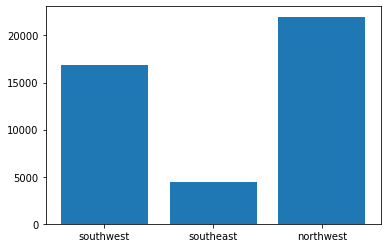

In [12]:
plt.bar(medical['region'].head(),medical['charges'].head())

In [13]:
medical.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
grp=medical.groupby('region')
grp.get_group('southeast')

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251
...,...,...,...,...,...,...,...
1322,62,male,38.83,0,no,southeast,12981.3457
1323,42,female,40.37,2,yes,southeast,43896.3763
1327,51,male,30.03,1,no,southeast,9377.9047
1330,57,female,25.74,2,no,southeast,12629.1656
